# Pseudo-Riemannian manifolds in SageMath
## The Schwarzschild spacetime example

This notebook demonstrates some SageMath tools for pseudo-Riemannian geometry, developed through the [SageManifolds project](https://sagemanifolds.obspm.fr/), by these [authors](https://sagemanifolds.obspm.fr/authors.html). 

First we set up the notebook to display outputs via LaTeX rendering:

In [1]:
%display latex 

Since some computations are quite heavy, we ask for running them in parallel on 8 
threads:

In [2]:
Parallelism().set(nproc=8)

We introduce the **Schwarzschild spacetime**, which is the spacetime of a **static black hole** in general relativity, as a **4-dimensional Lorentzian manifold** $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
M

4-dimensional Lorentzian manifold M

In [4]:
print(M)

4-dimensional Lorentzian manifold M


In [5]:
M.category()

Category of smooth manifolds over Real Field with 53 bits of precision

In [6]:
M.base_field()

Real Field with 53 bits of precision

In [7]:
print(M.base_field())

Real Field with 53 bits of precision


## Coordinate charts

The function `Manifold` generates a manifold with no-predefined coordinate chart, so that the manifold (user) atlas is empty:

In [8]:
M.atlas()

[]

We introduce the standard **Schwarzchild-Droste coordinates** $(t,r,\theta,\phi)$ on $M$, via the method `chart`:

In [9]:
SD.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")

Note that the argument of `chart()` is a raw string (hence the prefix `r` in front of it), which defines the range of each coordinate, if different from $(-\infty, +\infty)$, as well as its LaTeX symbol, if different from the Python symbol to denote the coordinate. The Python variables for each coordinate are declared within the `<...>` operator on the left-hand side, `SD` denoting the Python variable chosen for the coordinate chart.

In [10]:
SD

Chart (M, (t, r, th, ph))

In [11]:
print(SD)

Chart (M, (t, r, th, ph))


In [12]:
SD.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

Thanks to the SageMath operator `<...>` used in the chart declaration, the coordinates are immediately available:

In [13]:
th

th

They are SageMath's symbolic expressions:

In [14]:
th.parent()

Symbolic Ring

They are also accessible as items of the chart:

In [15]:
SD[0], SD[3]

(t, ph)

In [16]:
SD[:]

(t, r, th, ph)

The manifold (user) atlas is no longer empty: 

In [17]:
M.atlas()

[Chart (M, (t, r, th, ph))]

Let us introduce a second chart on the manifold, that of **Eddington-Finkelstein coordinates**  $(T,r,\theta,\phi)$:

In [18]:
EF.<T, r, th, ph> = M.chart(r"T r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")
EF

Chart (M, (T, r, th, ph))

The transition map from Schwarzschild-Droste coordinates (chart `SD`) to Eddington-Finkelstein ones (chart `EF`) depends on a parameter $m$, the mass of the Schwarzschild black hole:

In [19]:
m = var('m')
assume(m > 0)

In [20]:
SD_to_EF = SD.transition_map(EF, [t +2*m*ln(abs(r/(2*m)-1)), r, th, ph])
SD_to_EF.display()

T = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [21]:
SD_to_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + T
r = r
th = th
ph = ph

In [22]:
M.atlas()

[Chart (M, (t, r, th, ph)), Chart (M, (T, r, th, ph))]

In [23]:
M.default_chart()

Chart (M, (t, r, th, ph))

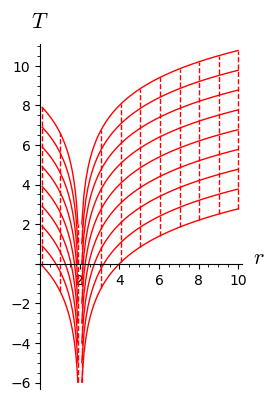

In [24]:
plot1 = SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}) \
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 9, r: 3},
                  style={t:'--', r:'-'}, parameters={m: 1})
plot1

## Manifold points

In [25]:
p = M((m, 8*m, pi/2, 0), name='p')
print(p)

Point p on the 4-dimensional Lorentzian manifold M


In [26]:
SD(p)

(m, 8*m, 1/2*pi, 0)

In [27]:
EF(p)

(m*(2*log(3) + 1), 8*m, 1/2*pi, 0)

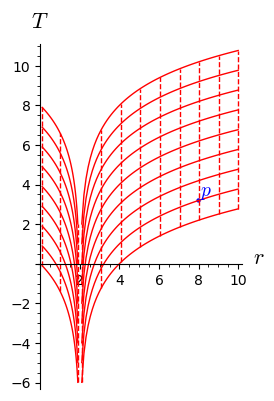

In [28]:
plot1 += p.plot(EF, color='blue', ambient_coords=(r,T), 
                parameters={m: 1}, label_offset=0.4, fontsize=14)
plot1

## Vector fields

In [29]:
SD.frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

In [30]:
EF.frame()

Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))

In [31]:
M.frames()

[Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))]

In [32]:
M.default_frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

In [33]:
vt = SD.frame()[0]
vt

Vector field d/dt on the 4-dimensional Lorentzian manifold M

In [34]:
vt.display()

d/dt = d/dt

In [35]:
vt.display(EF.frame())

d/dt = d/dT

In [36]:
vr = SD.frame()[1]
vr

Vector field d/dr on the 4-dimensional Lorentzian manifold M

In [37]:
vr.display(EF.frame())

d/dr = -2*m/(2*m - r) d/dT + d/dr

In [38]:
k = M.vector_field(1, -1, 0, 0, frame=EF.frame(), name='k')
k.display()

k = -r/(2*m - r) d/dt - d/dr

In [39]:
k.display(EF.frame())

k = d/dT - d/dr

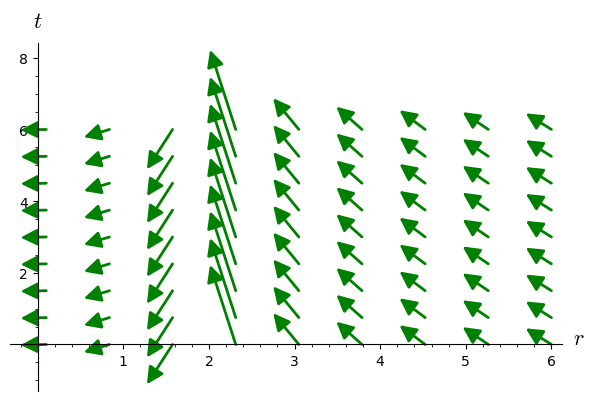

In [40]:
k.plot(ambient_coords=(r,t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (0.1, 6)}, number_values=9,
       parameters={m: 1}, color='green', scale=0.3)

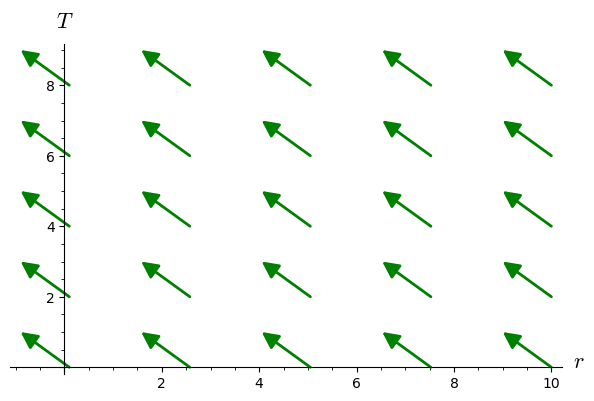

In [41]:
k.plot(chart=EF, ambient_coords=(r,T), chart_domain=EF,
       fixed_coords={th: pi/2, ph: 0}, ranges={T: (0, 8), r: (0.1, 10)}, 
       number_values=5, parameters={m: 1}, color='green')

### Vector fields as sections of the tangent bundle

In [42]:
TM = M.tangent_bundle()
print(TM)

Tangent bundle TM over the 4-dimensional Lorentzian manifold M


In [43]:
k1 = TM.section({EF.frame(): [1, -1, 0, 0]})
print(k1)

Vector field on the 4-dimensional Lorentzian manifold M


In [44]:
k1 == k

True

### The set of all vector fields on $M$ as a $C^\infty(M)$-module:

In [45]:
XM = M.vector_field_module()
print(XM)
XM

Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M


Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M

In [46]:
XM.base_ring()

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M

In [47]:
print(XM.base_ring())

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M


In [48]:
XM.base_ring().an_element().display()

M --> R
(t, r, th, ph) |--> 2
(T, r, th, ph) |--> 2

### Vectors at a point

In [49]:
kp = k.at(p)
print(kp)

Tangent vector k at Point p on the 4-dimensional Lorentzian manifold M


In [50]:
kp.parent()

Tangent space at Point p on the 4-dimensional Lorentzian manifold M

In [51]:
kp.parent() is TM.fiber(p)

True

In [52]:
kp.display()

k = 4/3 d/dt - d/dr

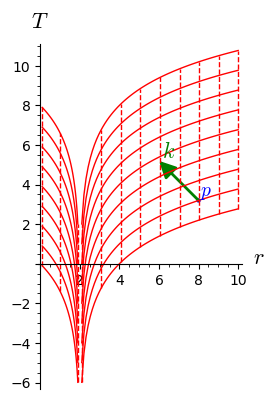

In [53]:
plot1 += kp.plot(EF, color='green', ambient_coords=(r,T), 
                 parameters={m: 1}, scale=2, label_offset=0.5, 
                 fontsize=16)
plot1

### Vector field defined on an open subset

Let us introduce the exterior $E$ of the black hole as an open subset of $M$:

In [54]:
E = M.open_subset('E', coord_def = {SD: r>2*m})

In [55]:
SD.restrict(E).coord_range()

t: (-oo, +oo); r: (2*m, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [56]:
p in E

True

In [57]:
u = E.vector_field(name='u')
u[0] = 1/sqrt(1-2*m/r)
u.display()

u = 1/sqrt(-2*m/r + 1) d/dt

In [58]:
SD_to_EF.restrict(E)

Change of coordinates from Chart (E, (t, r, th, ph)) to Chart (E, (T, r, th, ph))

In [59]:
E.atlas()

[Chart (E, (t, r, th, ph)), Chart (E, (T, r, th, ph))]

In [60]:
u.display(EF.frame().restrict(E))

u = 1/sqrt(-2*m/r + 1) d/dT

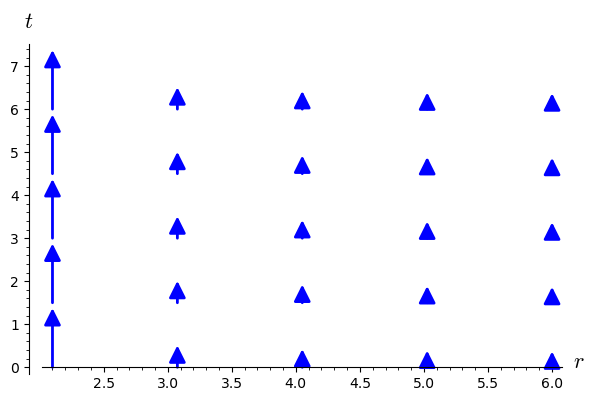

In [61]:
u.plot(ambient_coords=(r, t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (2.1, 6)}, number_values=5, 
       parameters={m: 1}, scale=0.3)

In [62]:
u.at(p).display()

u = 2/3*sqrt(3) d/dt

## Metric tensor

We define next the **metric tensor** $g$ from its non-vanishing components in the manifold's default frame, namely the coordinate frame associated to Schwarzschild-Droste coordinate:

In [63]:
g = M.metric()
g[0, 0] = - (1 - 2*m/r)
g[1, 1] = 1/(1 - 2*m/r)
g[2, 2] = r^2
g[3, 3] = r^2*sin(th)^2

In [64]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [65]:
SD.coframe()

Coordinate coframe (M, (dt,dr,dth,dph))

In [66]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

In [67]:
g[1,1]

-1/(2*m/r - 1)

$g_{rr}$ is diverging at $r=2m$: this is a singularity of the Schwarszchild-Droste coordinates.

In [68]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [69]:
g.display(EF.frame())

g = (2*m/r - 1) dT*dT + 2*m/r dT*dr + 2*m/r dr*dT + (2*m + r)/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [70]:
g[EF.frame(),:]

[    2*m/r - 1         2*m/r             0             0]
[        2*m/r   (2*m + r)/r             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

In [71]:
g.tensor_type()

(0, 2)

In [72]:
s = g(u, k)
s

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M

In [73]:
print(s)

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M


In [74]:
s.display()

g(u,k): E --> R
   (t, r, th, ph) |--> -sqrt(r)/sqrt(-2*m + r)

In [75]:
s.expr()

-sqrt(r)/sqrt(-2*m + r)

In [76]:
g(k, k).display()

g(k,k): M --> R
   (t, r, th, ph) |--> 0
   (T, r, th, ph) |--> 0

$u$ is a unit timelike vector:

In [77]:
g(u, u).display()

g(u,u): E --> R
   (t, r, th, ph) |--> -1

In [78]:
u.dot(u)

Scalar field u.u on the Open subset E of the 4-dimensional Lorentzian manifold M

In [79]:
u.dot(u).display()

u.u: E --> R
   (t, r, th, ph) |--> -1

## Levi-Civita connection

In [80]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [81]:
nabla.display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^t_r,t = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

In [82]:
Parallelism().set(nproc=1)

In [83]:
Dk = nabla(k)
Dk

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M

In [84]:
print(Dk)

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M


In [85]:
Dk.display()

nabla_g(k) = m/(2*m*r - r^2) d/dt*dt - m/(4*m^2 - 4*m*r + r^2) d/dt*dr + m/r^2 d/dr*dt - m/(2*m*r - r^2) d/dr*dr - 1/r d/dth*dth - 1/r d/dph*dph

In [86]:
Dk.display_comp()

nabla_g(k)^t_t = m/(2*m*r - r^2) 
nabla_g(k)^t_r = -m/(4*m^2 - 4*m*r + r^2) 
nabla_g(k)^r_t = m/r^2 
nabla_g(k)^r_r = -m/(2*m*r - r^2) 
nabla_g(k)^th_th = -1/r 
nabla_g(k)^ph_ph = -1/r

In [87]:
Ak = Dk.contract(k)
print(Ak)

Vector field on the 4-dimensional Lorentzian manifold M


In [88]:
Ak.display()

0

In [89]:
Ak == Dk['^a_b']*k['^b']

True

In [90]:
Parallelism().set(nproc=8)

In [91]:
Au = nabla(u).contract(u)
Au.display()

m/r^2 d/dr

In [92]:
Dg = nabla(g)
print(Dg)

Tensor field nabla_g(g) of type (0,3) on the 4-dimensional Lorentzian manifold M


In [93]:
Dg.display()

nabla_g(g) = 0

## Curvature

The **Riemann curvature tensor** is computed as

In [94]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


In [95]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

The component $\mathrm{Riem}(g)^t_{\ \, rtr} = \mathrm{Riem}(g)^0_{\ \, 101}$ is returned by 

In [96]:
Riem[0,1,0,1]

-2*m/(2*m*r^2 - r^3)

In [97]:
Riem.display_comp(EF.frame(), only_nonredundant=True)

Riem(g)^T_T,T,r = 4*m^2/r^4 
Riem(g)^T_r,T,r = 2*(2*m^2 + m*r)/r^4 
Riem(g)^T_th,T,th = -m/r 
Riem(g)^T_ph,T,ph = -m*sin(th)^2/r 
Riem(g)^r_T,T,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_r,T,r = -4*m^2/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_T,T,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_T,r,th = 2*m^2/r^4 
Riem(g)^th_r,T,th = 2*m^2/r^4 
Riem(g)^th_r,r,th = (2*m^2 + m*r)/r^4 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_T,T,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_T,r,ph = 2*m^2/r^4 
Riem(g)^ph_r,T,ph = 2*m^2/r^4 
Riem(g)^ph_r,r,ph = (2*m^2 + m*r)/r^4 
Riem(g)^ph_th,th,ph = -2*m/r

The **Kretschmann scalar** is the "square" of the Riemann tensor defined by 
$$K = R_{abcd} \, R^{abcd}, \qquad R := \mathrm{Riem}(g)$$
To compute it, we must first form the tensor fields whose components are $R_{abcd}$ and 
$R^{abcd}$. They are obtained by respectively lowering and raising the indices of the components $R^a_{\ \, bcd}$ of the Riemann tensor, via the metric $g$. These two operations are performed by the methods `down()` and `up()`. The contraction is performed by summation on repeated indices, using LaTeX notations:

In [98]:
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
print(K)
K.display()

Scalar field on the 4-dimensional Lorentzian manifold M


M --> R
(t, r, th, ph) |--> 48*m^2/r^6
(T, r, th, ph) |--> 48*m^2/r^6

In [99]:
K.expr()

48*m^2/r^6

Since $\lim_{r\to 0} K = +\infty$, we may say that $r=0$ is a **curvature singularity** of Schwarzschild spacetime.

### Ricci tensor

In [100]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


We check that the Schwarzschild metric is a solution of the vacuum **Einstein equation**:

In [101]:
Ric.display()

Ric(g) = 0

## Geodesics

First, for graphical purposes, we introduce the **Euclidean space** $\mathbb{E}^3$ and some map $M\to \mathbb{E}^3$:

In [102]:
E3.<x,y,z> = EuclideanSpace()
X3 = E3.cartesian_coordinates()
to_E3 = M.diff_map(E3, {(SD, X3): 
                        [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]})
to_E3.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))
   (T, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

## A timelike geodesic

Let us consider the geodesic starting at point $p$ and having the following tangent vector at $p$: 

In [103]:
v0 = M.tangent_space(p)((1.3, 0, 0, 0.064/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0640000000000000/m d/dph

We declare the geodesic with such initial conditions, denoting by $s$ the affine parameter (proper time), with $(s_{\rm min}, s_{\rm max})=(0, 1500\,m)$:

In [104]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 2000), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

In [105]:
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot

In [106]:
geod.plot_integrated(chart=X3, mapping=to_E3, plot_points=1000, 
                     thickness=2, label_axes=False) \
+ p.plot(chart=X3, mapping=to_E3, size=4, parameters={m: 1}) \
+ sphere(size=2, color='grey')

Graphics3d Object

A 2D view by suppressing $z$ from the ambient coordinates:

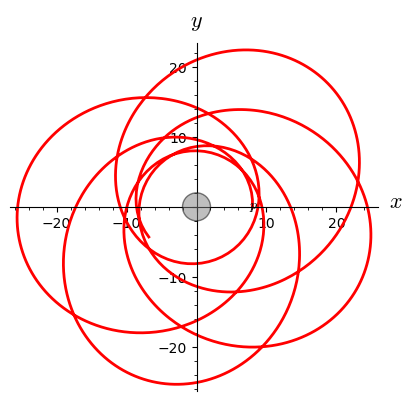

In [107]:
bh_plot = circle((0, 0), 2, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), plot_points=1000, 
                     thickness=2) \
+ p.plot(chart=X3, mapping=to_E3, ambient_coords=(x,y), size=4, parameters={m: 1}) \
+ bh_plot

## Null geodesics

In [108]:
p0 = M((0, 10*m, pi/2, 0))
v0 = M.tangent_space(p0)((1.25, -0.774597, 0, 0.070711/m))
v0.display()

1.25000000000000 d/dt - 0.774597000000000 d/dr + 0.0707110000000000/m d/dph

In [109]:
g.at(p0)(v0, v0)

5.19261124987125e-6

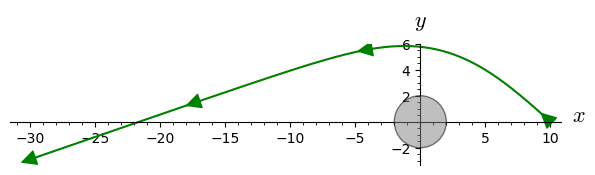

In [110]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 = geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                             plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                             color_tangent='green', plot_points_tangent=4, scale=1) 
plot2 += bh_plot
plot2

In [111]:
v0 = M.tangent_space(p0)((1.25, -0.894427, 0, 0.05/m))
g.at(p0)(v0, v0)

-4.27088750032389e-7

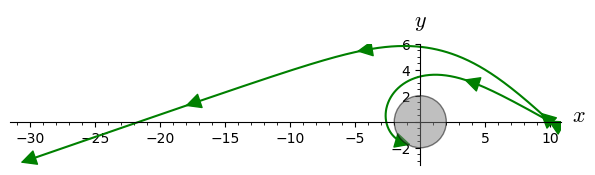

In [112]:
geod = M.integrated_geodesic(g, (s, 0, 13.25), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                              color_tangent='green', plot_points_tangent=3, scale=0.2)
plot2

### The photon orbit

In [113]:
p0 = M((0, 3*m, pi/2, 0))
v0 = M.tangent_space(p0)((3, 0, 0, 1/(sqrt(3)*m)))
v0.display()

3 d/dt + 1/3*sqrt(3)/m d/dph

In [114]:
g.at(p0)(v0, v0)

0

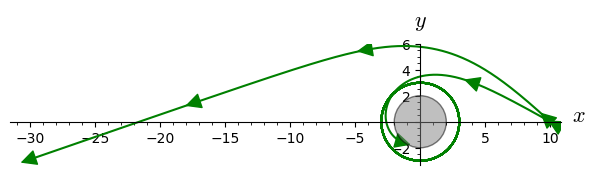

In [115]:
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5)
plot2

## Using SymPy as the symbolic backend

By default, the symbolic backend used in tensor calculus is SageMath's one (Pynac + Maxima), implemented via the symbolic ring `SR`. We can choose to use SymPy instead:

In [116]:
M.set_calculus_method('sympy')

In [117]:
v = 2*k

In [118]:
v.display()

2*r/(-2*m + r) d/dt - 2 d/dr

In [119]:
v[0]

2*r/(-2*m + r)

In [120]:
v[0].expr()

2*r/(-2*m + r)

In [121]:
type(v[0].expr())

<class 'sympy.core.mul.Mul'>

In [122]:
M.set_calculus_method('SR')

In [123]:
type(v[0].expr())

<class 'sage.symbolic.expression.Expression'>

# Going further


Visit the [SageManifolds examples](http://sagemanifolds.obspm.fr/examples.html). 